In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [11]:
#01
# Read the data
df = pd.read_csv('insurance.csv')

In [12]:
#02
# Display the first 5 rows
print(df.head())

# Display the last 5 rows
print(df.tail())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [13]:
#03
# Display the number of rows and columns
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 1338, Number of columns: 7


In [14]:
#04
# Display the number of categorical and numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Number of numerical columns: {len(numerical_cols)}")
print(f"Number of categorical columns: {len(categorical_cols)}")

Number of numerical columns: 4
Number of categorical columns: 3


In [15]:
#05
# Display min, max, and mode for numerical columns
for col in numerical_cols:
    print(f"Column: {col}")
    print(f"Min: {df[col].min()}, Max: {df[col].max()}, Mode: {df[col].mode().values[0]}")
    print()

Column: age
Min: 18, Max: 64, Mode: 18

Column: bmi
Min: 15.96, Max: 53.13, Mode: 32.3

Column: children
Min: 0, Max: 5, Mode: 0

Column: charges
Min: 1121.8739, Max: 63770.42801, Mode: 1639.5631



In [3]:
#06
# Display columns with null values
null_cols = df.columns[df.isnull().any()]
print(f"Columns with null values: {null_cols}")

Columns with null values: Index([], dtype='object')


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


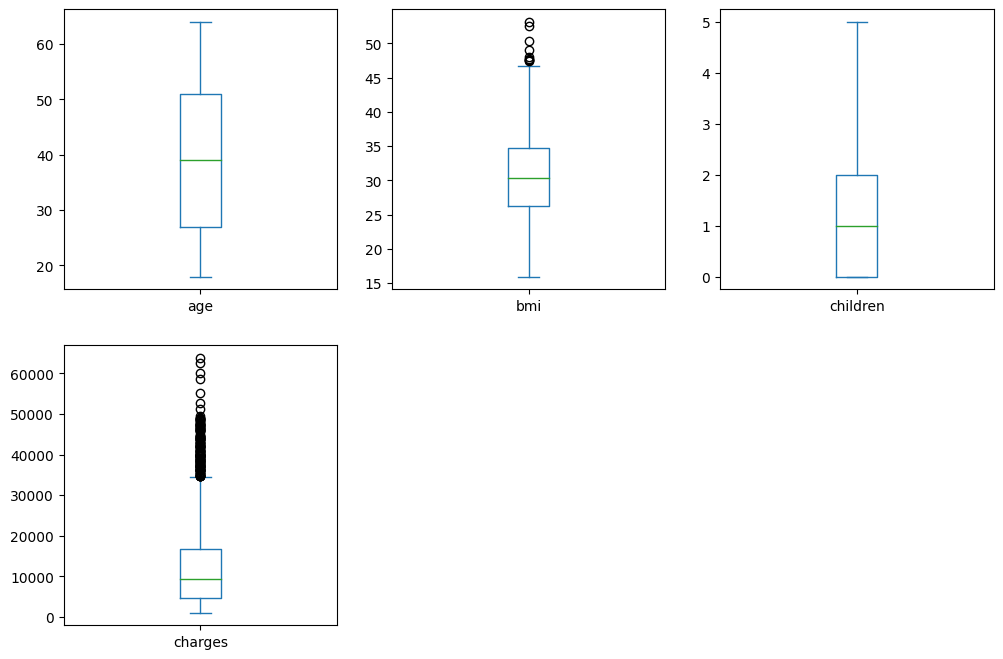

In [4]:
#07
# Calculate 5-number summary
summary = df[numerical_cols].describe()
print(summary)

# Correlate with box plot
df[numerical_cols].plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 8))
plt.show()

In [18]:
#08
# Display outlier values using Z-score
for col in numerical_cols:
    z_scores = stats.zscore(df[col])
    outliers = df[(np.abs(z_scores) > 3)]
    print(f"Outliers in column {col}: {outliers.shape[0]}")
    print(outliers)
    print()

Outliers in column age: 0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

Outliers in column bmi: 4
      age   sex    bmi  children smoker     region     charges
116    58  male  49.06         0     no  southeast  11381.3254
847    23  male  50.38         1     no  southeast   2438.0552
1047   22  male  52.58         1    yes  southeast  44501.3982
1317   18  male  53.13         0     no  southeast   1163.4627

Outliers in column children: 18
      age     sex     bmi  children smoker     region      charges
32     19  female  28.600         5     no  southwest   4687.79700
71     31    male  28.500         5     no  northeast   6799.45800
166    20  female  37.000         5     no  southwest   4830.63000
413    25    male  23.900         5     no  southwest   5080.09600
425    45    male  24.310         5     no  southeast   9788.86590
438    52  female  46.750         5     no  southeast  12592.53450
568    49  female  31.900         5     no  

In [19]:
#09
# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Display features with high positive correlation
high_pos_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix != 1)]
print(f"Features with high positive correlation: {high_pos_corr}")

# Display features with high negative correlation
high_neg_corr = corr_matrix[(corr_matrix < -0.7) & (corr_matrix != -1)]
print(f"Features with high negative correlation: {high_neg_corr}")

# Display features with no correlation
no_corr = corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)]
print(f"Features with no correlation: {no_corr}")

Features with high positive correlation:           age  bmi  children  charges
age       NaN  NaN       NaN      NaN
bmi       NaN  NaN       NaN      NaN
children  NaN  NaN       NaN      NaN
charges   NaN  NaN       NaN      NaN
Features with high negative correlation:           age  bmi  children  charges
age       NaN  NaN       NaN      NaN
bmi       NaN  NaN       NaN      NaN
children  NaN  NaN       NaN      NaN
charges   NaN  NaN       NaN      NaN
Features with no correlation:                age       bmi  children   charges
age            NaN  0.109272  0.042469  0.299008
bmi       0.109272       NaN  0.012759  0.198341
children  0.042469  0.012759       NaN  0.067998
charges   0.299008  0.198341  0.067998       NaN


<ipython-input-20-861eda2b1780>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=False)


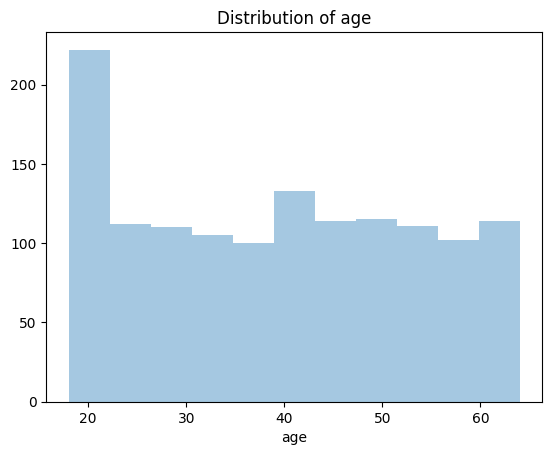

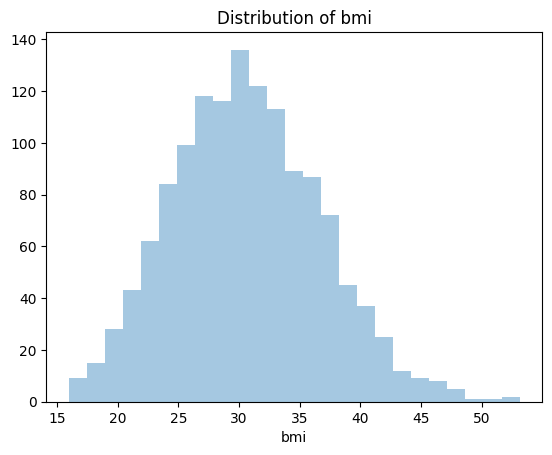

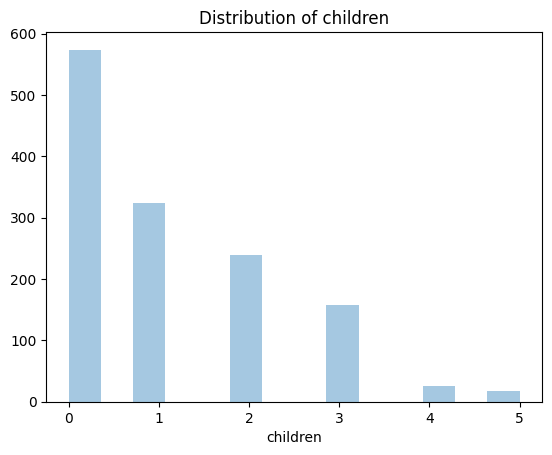

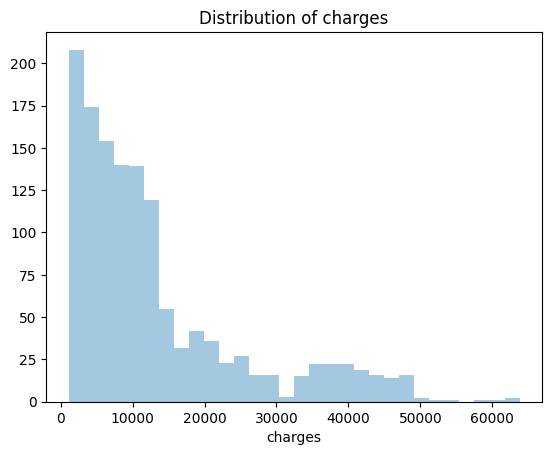

Features with right skew: Index(['charges'], dtype='object')
Features with left skew: Index([], dtype='object')
Features with no skew: Index(['age', 'bmi', 'children'], dtype='object')


In [20]:
#10
import seaborn as sns

# Analyze skewness of features
for col in numerical_cols:
    sns.distplot(df[col], kde=False)
    plt.title(f"Distribution of {col}")
    plt.show()

# Display features with right skew, left skew, and no skew
skewness = df[numerical_cols].skew()
right_skew = skewness[skewness > 1]
left_skew = skewness[skewness < -1]
no_skew = skewness[(skewness >= -1) & (skewness <= 1)]
print(f"Features with right skew: {right_skew.index}")
print(f"Features with left skew: {left_skew.index}")
print(f"Features with no skew: {no_skew.index}")

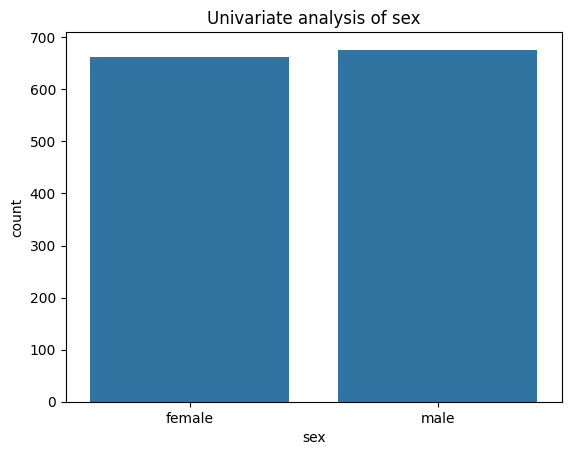

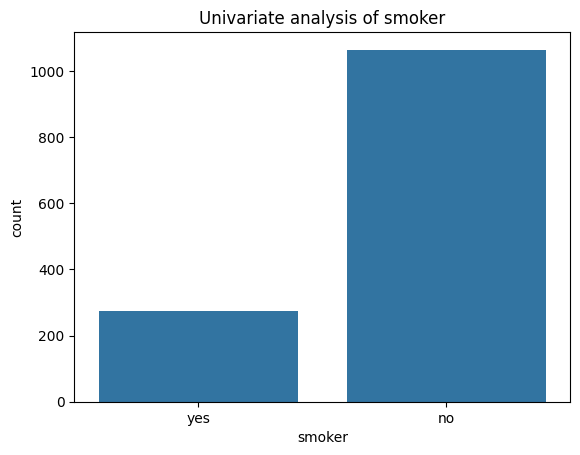

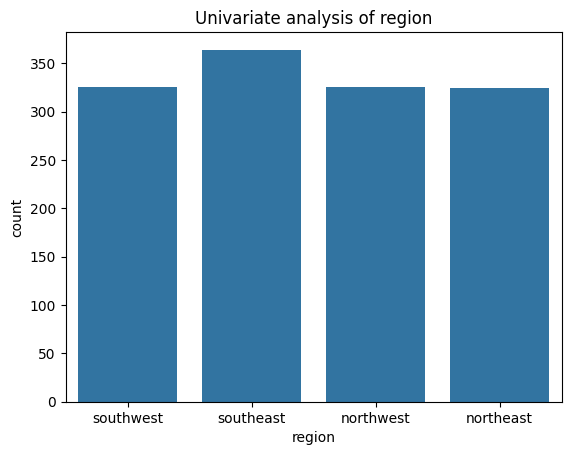

In [21]:
#11
# Perform univariate analysis for categorical variables using bar plot
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Univariate analysis of {col}")
    plt.show()

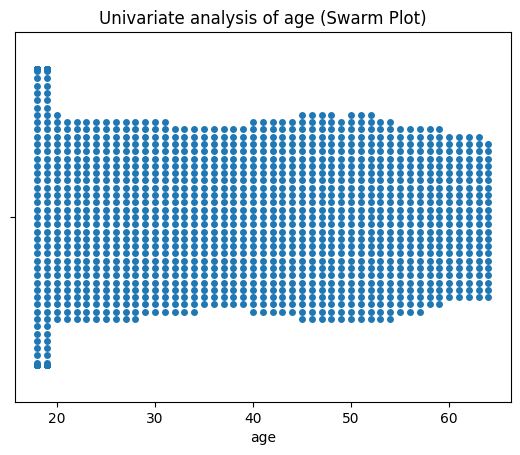

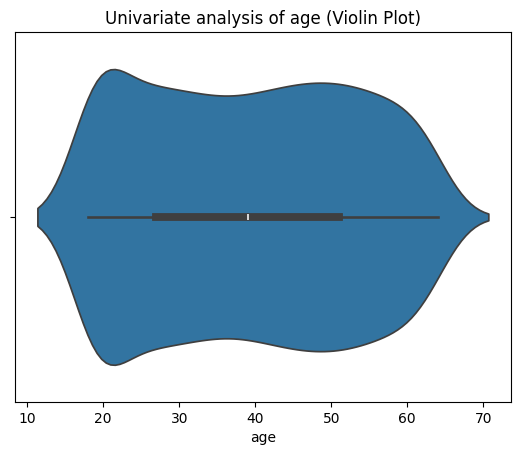

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


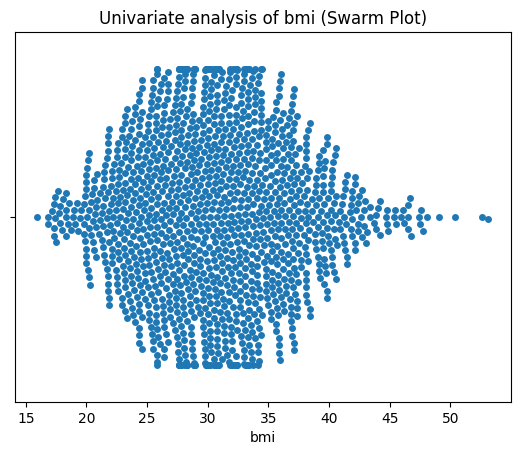

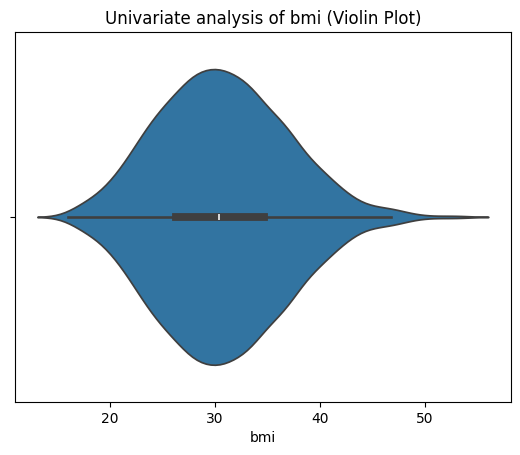

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 84.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


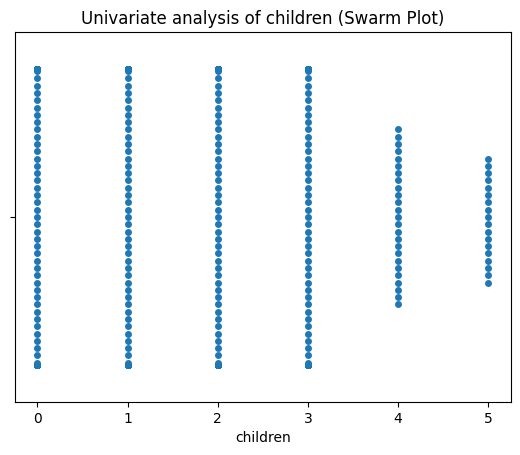

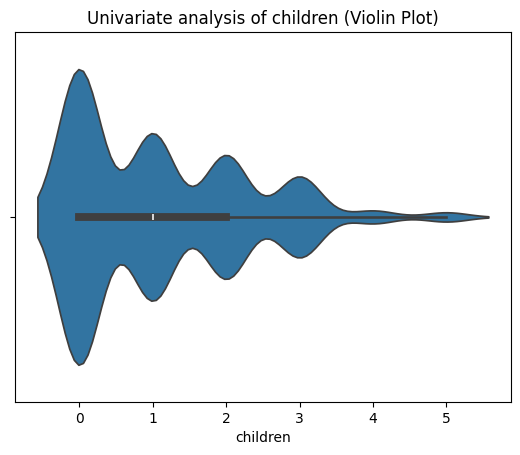

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 26.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


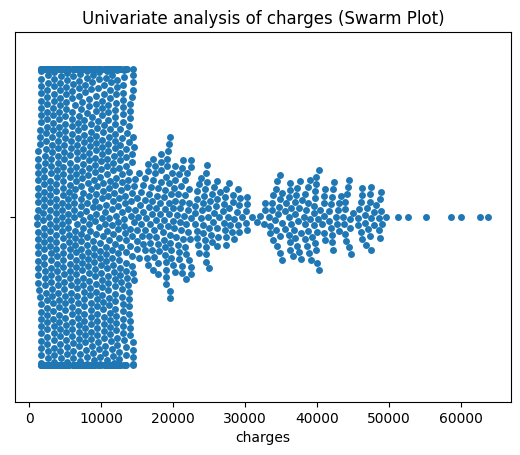

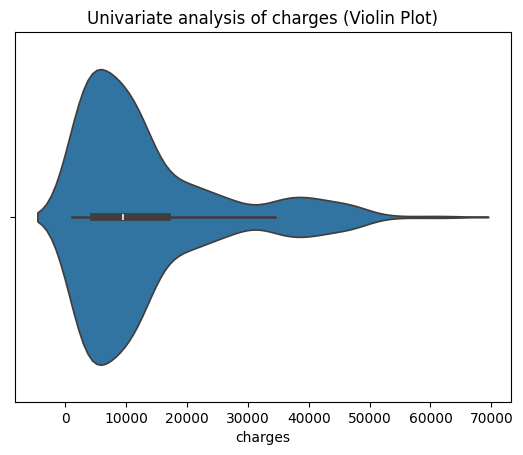

In [23]:
#12
# Perform univariate analysis for continuous variables
for col in numerical_cols:
    sns.swarmplot(x=col, data=df)
    plt.title(f"Univariate analysis of {col} (Swarm Plot)")
    plt.show()

    sns.violinplot(x=col, data=df)
    plt.title(f"Univariate analysis of {col} (Violin Plot)")
    plt.show()

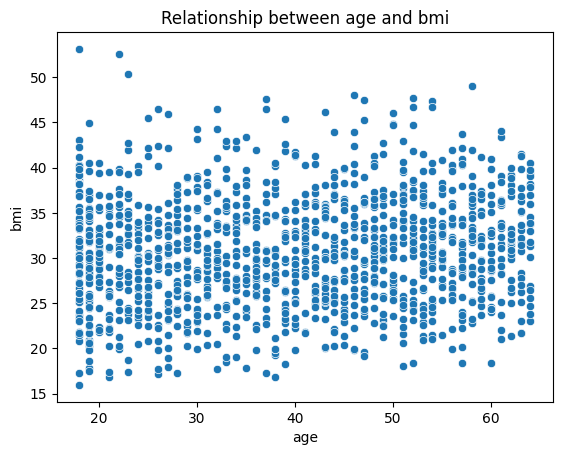

In [24]:
#13
# Display scatter plot to show the relationship between two continuous variables
sns.scatterplot(x='age', y='bmi', data=df)
plt.title("Relationship between age and bmi")
plt.show()

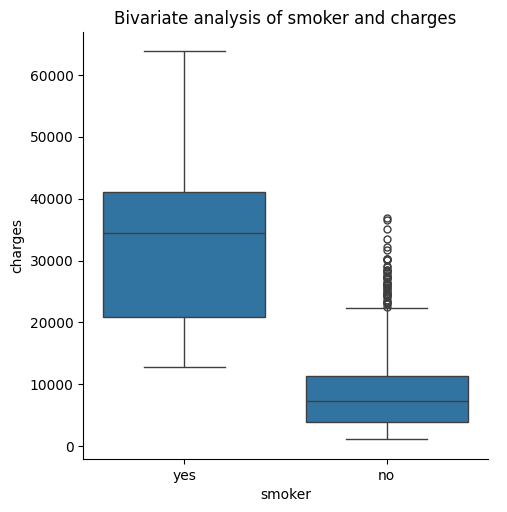

In [25]:
#14
# Perform bivariate analysis between continuous variable and categorical variable
sns.catplot(x='smoker', y='charges', data=df, kind='box')
plt.title("Bivariate analysis of smoker and charges")
plt.show()

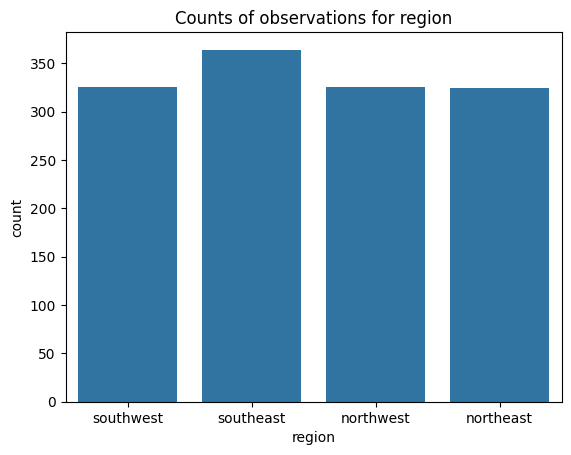

In [26]:
#15
# Display counts of observations for categorical variable
sns.countplot(x='region', data=df)
plt.title("Counts of observations for region")
plt.show()

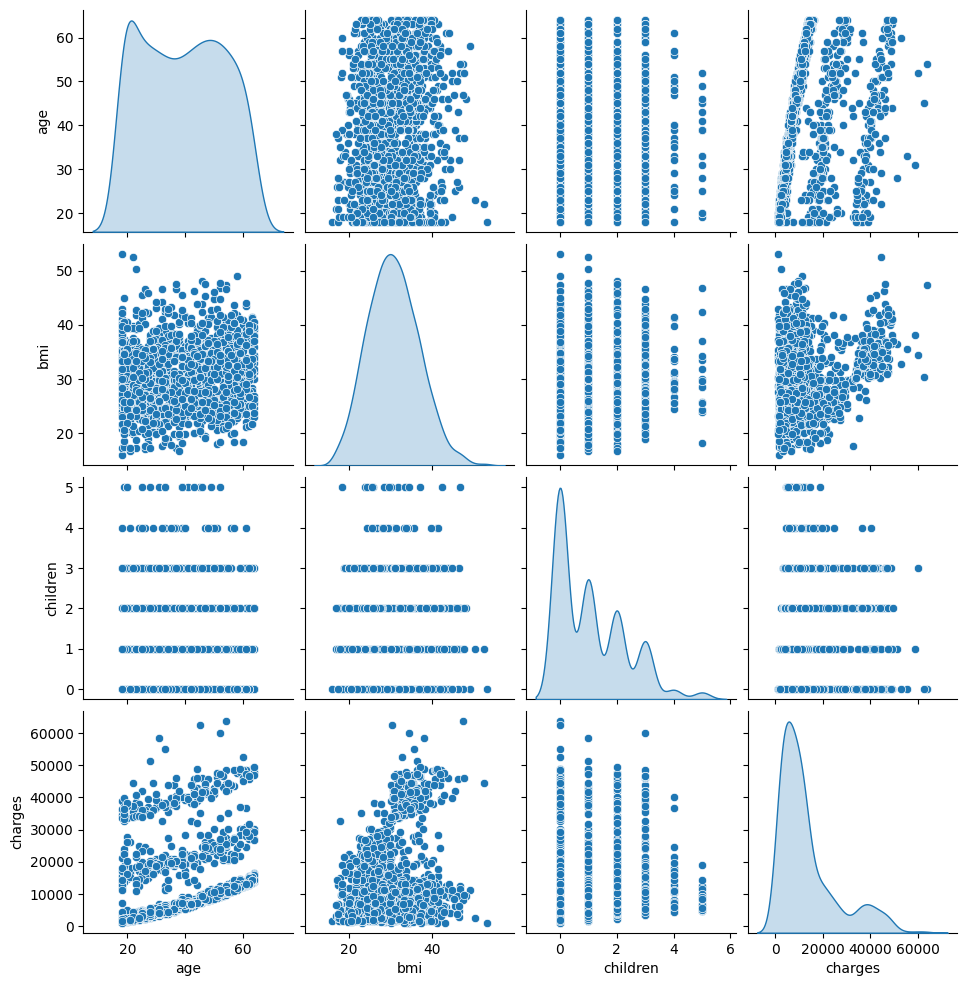

In [27]:
#16
# Perform multivariate analysis between features
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.show()

In [28]:
#Crafted With Love By Sam Naveenkumar .V